# Immune diversity

In [1]:
import pandas as pd
df_imrep_RNASeq = pd.read_csv('imrep.RNASeq.csv')

metadata=pd.read_csv('../outcomes/PILOT.RNASeq.clean.metadata.csv')
data_imrep_RNASeq=pd.merge(df_imrep_RNASeq, metadata, on='ID')
depth_RNASeq=pd.read_csv('../bams/NR.RNASeq.csv')
data_RNASeq_cov=pd.merge(data_imrep_RNASeq, depth_RNASeq, on='ID')
data_imrep_RNASeq2 = data_imrep_RNASeq[['patientBarcode', 'nIGH2','nTCRA2', 'loadTCRA2','alphaTCRA2','loadIGH2','alphaIGH2','disease']].copy()
#data_imrep_RNASeq['nIGH2.norm']=(data_imrep_RNASeq['nIGH2']/data_imrep_RNASeq['NR'])*1000000
data_imrep_RNASeq2.head()



,patientBarcode,nIGH2,nTCRA2,loadTCRA2,alphaTCRA2,loadIGH2,alphaIGH2,disease
0,TCGA-BF-A5EP,0,8,26,1.944819,0,0.000000,SKCM
1,TCGA-HC-7210,31,98,322,4.221790,134,2.979456,PRAD
2,TCGA-E2-A9RU,2,11,24,2.383540,5,0.673012,BRCA
3,TCGA-HC-7817,10,43,188,3.009883,51,1.985041,PRAD
4,TCGA-E2-A1B4,25,412,3693,3.651290,177,3.017662,BRCA


In [2]:
import pandas as pd
df_imrep_WXS = pd.read_csv('imrep.WXS.csv')
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
data_imrep_WXS=pd.merge(df_imrep_WXS, metadata, on='ID')
df = pd.read_csv('offtarget.WXS.csv')
data_imrep_WXS=pd.merge(data_imrep_WXS, df, on='ID')

data_imrep_WXS['nIGH_norm'] = data_imrep_WXS['nIGH']/data_imrep_WXS['cov']
data_imrep_WXS['nTCRA_norm'] = data_imrep_WXS['nTCRA']/data_imrep_WXS['cov']

data_imrep_WXS2 = data_imrep_WXS[['patientBarcode', 'nIGH_norm', 'nTCRA_norm', 'nIGH','nTCRA', 'loadTCRA','alphaTCRA','loadIGH','alphaIGH']].copy()


data_imrep_WXS2.head()

,patientBarcode,nIGH_norm,nTCRA_norm,nIGH,nTCRA,loadTCRA,alphaTCRA,loadIGH,alphaIGH
0,TCGA-A2-A4S1,0.0,0.556498,0,3,57,0.609508,0,0.0
1,TCGA-BH-A1EY,0.0,4.429647,0,22,96,2.450031,0,0.0
2,TCGA-A7-A13G,0.0,24.034023,0,76,226,3.975466,0,0.0
3,TCGA-C8-A1HK,0.0,4.697186,0,22,94,2.607778,0,0.0
4,TCGA-A2-A25D,0.0,4.210087,0,14,69,2.231937,0,0.0


In [3]:
data_imrep_both=pd.merge(data_imrep_WXS2, data_imrep_RNASeq2, on='patientBarcode')
data_imrep_both.head()

,patientBarcode,nIGH_norm,nTCRA_norm,nIGH,nTCRA,loadTCRA,alphaTCRA,loadIGH,alphaIGH,nIGH2,nTCRA2,loadTCRA2,alphaTCRA2,loadIGH2,alphaIGH2,disease
0,TCGA-BH-A1EY,0.00000,4.429647,0,22,96,2.450031,0,0.0,38,298,1411,4.274307,515,2.902973,BRCA
1,TCGA-A7-A6VW,0.00000,1.592631,0,6,48,1.062749,0,0.0,7,39,142,3.509253,22,1.870818,BRCA
2,TCGA-EW-A1J2,0.19395,6.012452,1,31,137,2.735603,2,-0.0,224,630,3029,5.023546,2311,4.516267,BRCA
3,TCGA-E9-A22G,0.00000,5.855541,0,19,103,2.025622,0,0.0,22,590,2710,4.644309,135,2.782239,BRCA
4,TCGA-OL-A6VR,0.00000,1.506134,0,9,166,0.834399,0,0.0,17,44,235,2.721254,103,2.615033,BRCA


In [4]:
data_imrep_both.groupby("disease")['nTCRA_norm'].describe()

,count,mean,std,min,25%,50%,75%,max
disease,,,,,,,,
BRCA,9.0,3.634373,2.015102,1.406218,1.592631,4.060250,5.827545,6.012452
LUAD,8.0,3.760972,1.325980,1.543192,2.881680,4.041267,4.870497,5.289723
LUSC,7.0,4.640160,3.200337,1.406820,2.552998,4.124728,5.425066,10.993442
PRAD,11.0,2.760176,1.168071,1.159230,1.623917,2.900482,3.626626,4.233447
SKCM,5.0,2.746067,1.473824,1.865354,1.945893,2.219247,2.340258,5.359584


In [5]:
data_imrep_both.describe()

,nIGH_norm,nTCRA_norm,nIGH,nTCRA,loadTCRA,alphaTCRA,loadIGH,alphaIGH,nIGH2,nTCRA2,loadTCRA2,alphaTCRA2,loadIGH2,alphaIGH2
count,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.054593,3.484263,0.15000,10.975000,65.650000,1.480230,0.300000,0.0,174.650000,242.275000,7727.875000,2.875821,4731.650000,2.419260
std,0.152321,1.943023,0.36162,10.547785,62.323206,0.700488,0.723241,0.0,480.320115,327.316281,18806.195398,1.509745,14153.420341,1.770522
min,0.000000,1.159230,0.00000,2.000000,8.000000,0.392674,0.000000,0.0,0.000000,8.000000,24.000000,0.109533,0.000000,-0.000000
25%,0.000000,1.925758,0.00000,4.000000,24.500000,0.928563,0.000000,0.0,3.000000,30.000000,148.000000,1.813158,11.000000,0.846389
50%,0.000000,3.278019,0.00000,7.000000,43.000000,1.373059,0.000000,0.0,23.000000,75.000000,1151.500000,2.754684,146.000000,2.702565
75%,0.000000,4.539371,0.00000,11.500000,91.000000,1.850014,0.000000,0.0,96.000000,299.000000,4535.750000,4.155401,836.000000,3.716288
max,0.712257,10.993442,1.00000,45.000000,297.000000,2.842638,2.000000,0.0,2595.000000,1319.000000,88026.000000,5.296408,68469.000000,6.407063


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.boxplot(x="disease", y="nIGH2", data=data_imrep_both)
g=sns.stripplot(x="disease", y="nIGH2", data=data_imrep_both, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='IGH clonality')
g=sns.despine()
#plt.show(g)
plt.savefig("IGH.clonality.RNASeq.pdf", bbox_inches='tight')

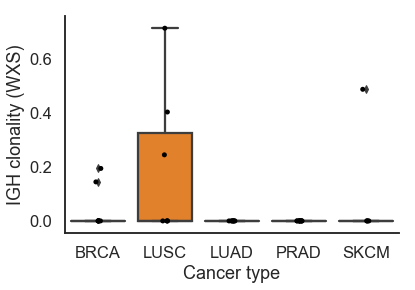

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.boxplot(x="disease", y="nIGH_norm", data=data_imrep_both)
g=sns.stripplot(x="disease", y="nIGH_norm", data=data_imrep_both, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='IGH clonality (WXS)')
g=sns.despine()
#plt.show(g)
plt.savefig("IGH.clonality.RNASeq.pdf", bbox_inches='tight')

/Users/serghei/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


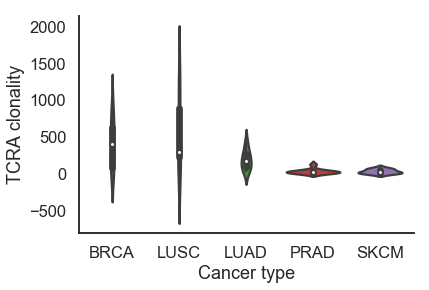

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.violinplot(x="disease", y="nTCRA2", data=data_imrep_both)
#g=sns.stripplot(x="disease", y="nTCRA2", data=data_imrep_both, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='TCRA clonality')
g=sns.despine()
#plt.show(g)
plt.savefig("IGH.clonality.RNASeq.pdf", bbox_inches='tight')

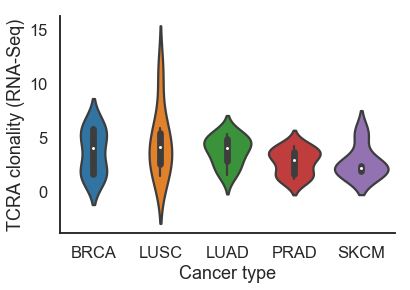

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.violinplot(x="disease", y="nTCRA_norm", data=data_imrep_both)
#g=sns.stripplot(x="disease", y="nTCRA_norm", data=data_imrep_both, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='TCRA clonality (RNA-Seq)')
g=sns.despine()
#plt.show(g)
plt.savefig("TCRA.clonality.RNASeq.pdf", bbox_inches='tight')

(0.5503657433601429, 0.0002338139338772098)
SpearmanrResult(correlation=1.0, pvalue=0.0)


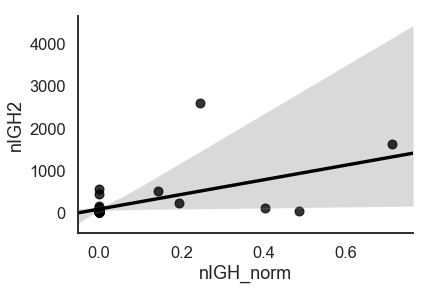

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.regplot(x="nIGH_norm", y="nIGH2", data=data_imrep_both,color="black")
g.set(xlabel='nIGH_norm', ylabel='nIGH2')
g=sns.despine()
#plt.show(g)
plt.savefig("MT.cov.WXS.vs.RNASeq.pdf", bbox_inches='tight')

print stats.pearsonr(data_imrep_both['nIGH_norm'], data_imrep_both['nIGH2'])
print stats.spearmanr(data_imrep_both['nIGH_norm'], data_imrep_both['nIGH_norm'])

(0.6718434976718981, 2.0692829687065825e-06)
SpearmanrResult(correlation=0.5087974750095988, pvalue=0.0008008767832121462)


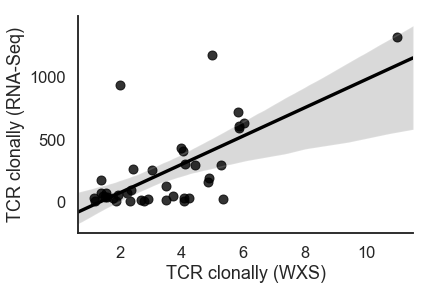

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.regplot(x="nTCRA_norm", y="nTCRA2", data=data_imrep_both,color="black")
g.set(xlabel='TCR clonally (WXS)', ylabel='TCR clonally (RNA-Seq)')
g=sns.despine()
#plt.show(g)
plt.savefig("imrep.corr.TCRA.pdf", bbox_inches='tight')

print stats.pearsonr(data_imrep_both['nTCRA_norm'], data_imrep_both['nTCRA2'])
print stats.spearmanr(data_imrep_both['nTCRA_norm'], data_imrep_both['nTCRA2'])